In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [45]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [46]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
train_images=train_images / 255.0
test_images=test_images / 255.0

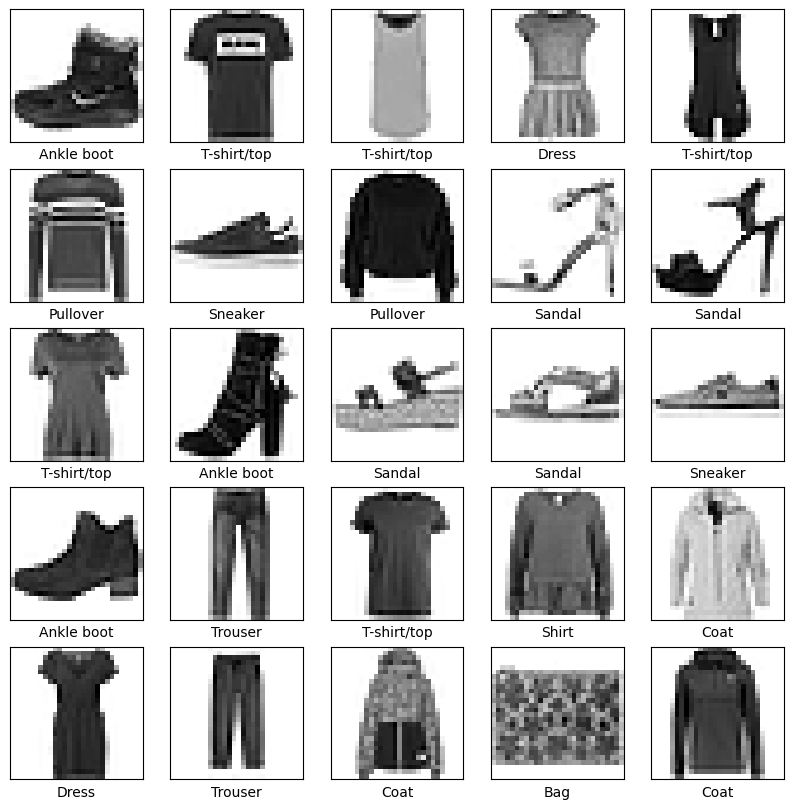

In [49]:
# Verify data is in correct format
plt.figure(figsize=(10, 10))
for i in range(25):
 plt.subplot(5, 5, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i]])
 plt.show

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
model=Sequential()
model=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10)
])

In [52]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7833 - loss: 0.6217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8638 - loss: 0.3800
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8791 - loss: 0.3333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3090
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8919 - loss: 0.2934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8967 - loss: 0.2813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9030 - loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9078 - loss: 0.2490
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9093 - loss: 0.2440
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9110 - loss: 0.2360


In [54]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print("\n Test accuracy=", test_acc)

313/313 - 0s - 643us/step - accuracy: 0.8800 - loss: 0.3400

 Test accuracy= 0.8799999952316284


In [55]:
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [56]:
predictions=probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


In [64]:
def plot_image(i, predictions_array, true_label, img): 
    true_label, img = true_label[i], img[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array) 
    if predicted_label == true_label:
      color = 'blue' 
    else:
      color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [65]:
from matplotlib import pyplot as plt

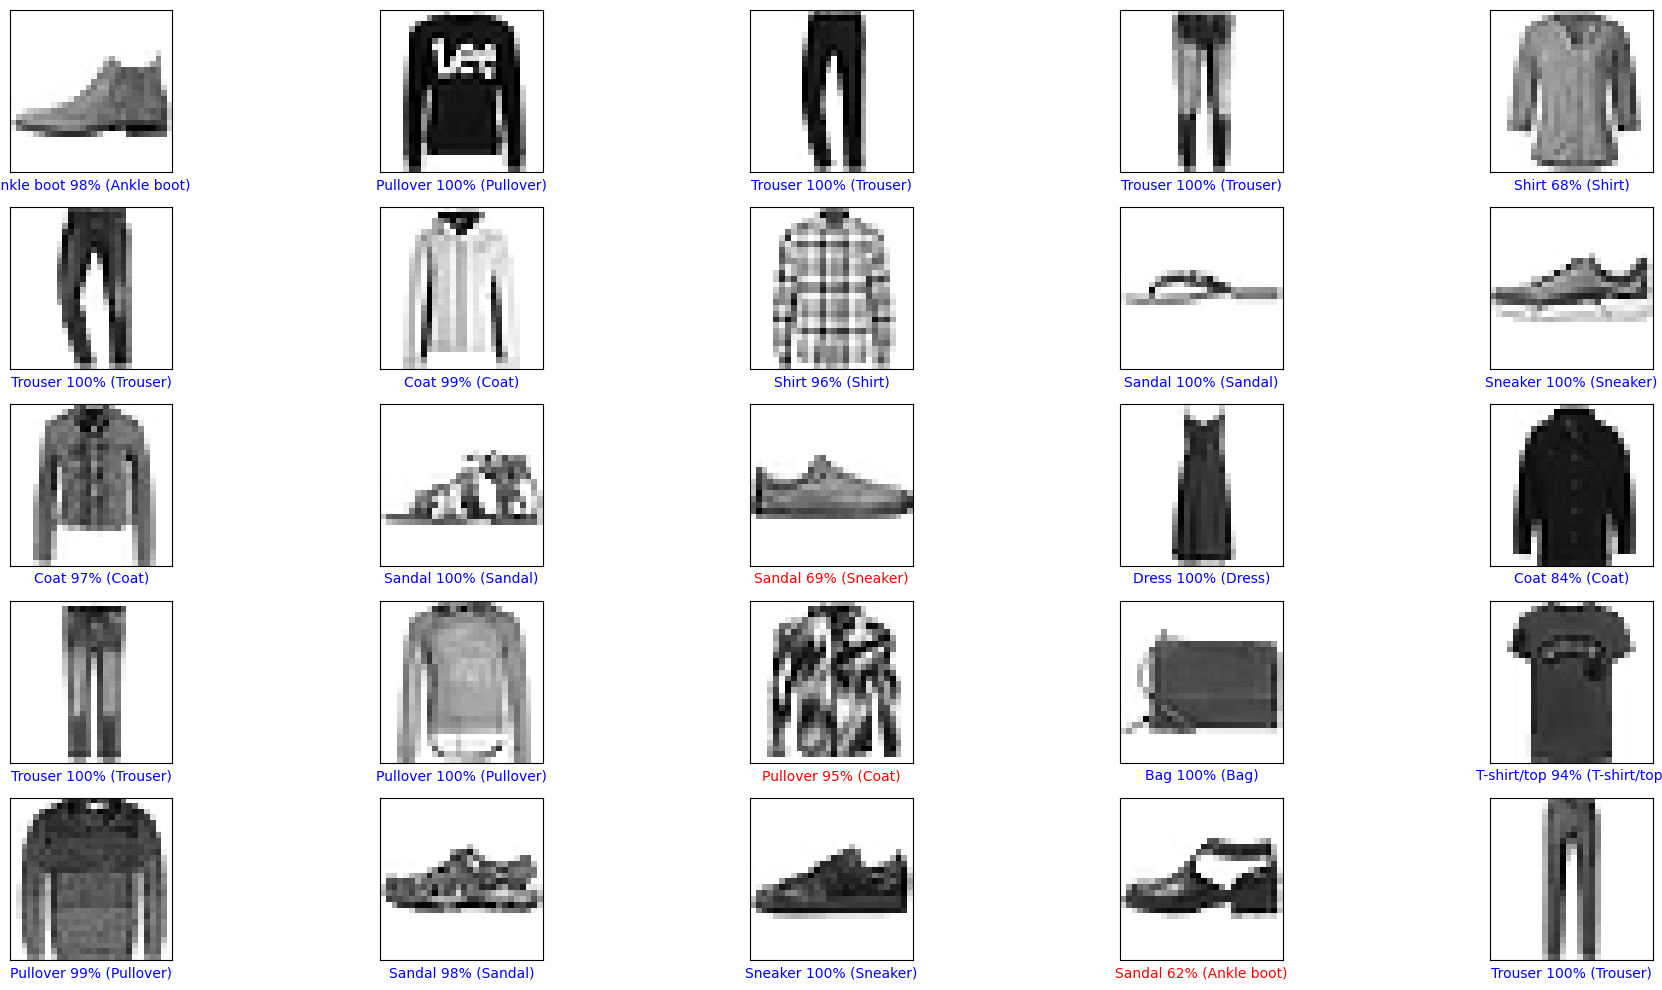

In [68]:
rows = 5
cols = 5
total_images = rows * cols 
plt.figure(figsize = (2*2*cols, 2*rows)) 
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()